## Imports

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

## Loading in the data 

In [2]:
data = pd.read_csv("SOL-USD.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


## Defining the scaler 

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
close_data = data['Close']

## Fitting the scaler on the data

In [6]:
final_data = scaler.fit_transform(close_data.values.reshape(-1, 1))

## Creating the training data

In [7]:
prediction_days = 50
x_train, y_train = [], []

for i in range(prediction_days, len(final_data)):
    x_train.append(final_data[i - prediction_days:i, 0])
    y_train.append(final_data[i, 0])

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train[0:51]

array([[0.00168633, 0.0010121 , 0.00142108, ..., 0.00029298, 0.00023172,
        0.00024821],
       [0.0010121 , 0.00142108, 0.00101602, ..., 0.00023172, 0.00024821,
        0.00028117],
       [0.00142108, 0.00101602, 0.0005675 , ..., 0.00024821, 0.00028117,
        0.00021186],
       ...,
       [0.00023172, 0.00024821, 0.00028117, ..., 0.00244874, 0.00299639,
        0.00138213],
       [0.00024821, 0.00028117, 0.00021186, ..., 0.00299639, 0.00138213,
        0.00178998],
       [0.00028117, 0.00021186, 0.00024078, ..., 0.00138213, 0.00178998,
        0.00174643]])

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Making the model (RNN)

In [11]:
model = keras.Sequential([
#     keras.layers.Bidirectional(keras.layers.LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1))), 
#     keras.layers.Dropout(0.15),
#     keras.layers.Bidirectional(keras.layers.LSTM(units=50, return_sequences=True)), 
    keras.layers.LSTM(10, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    keras.layers.LSTM(10, return_sequences=True), 
    keras.layers.Dense(1)
])

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
24/24 [==============================] - 3s 27ms/step - loss: 0.1111
Epoch 2/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0304
Epoch 3/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0233
Epoch 4/30
24/24 [==============================] - 1s 26ms/step - loss: 0.0218
Epoch 5/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0189
Epoch 6/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0218
Epoch 7/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0186
Epoch 8/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0177
Epoch 9/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0183
Epoch 10/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0182
Epoch 11/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0171
Epoch 12/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0169
Epoch 13/30
24/24 [==================

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
24/24 [==============================] - 4s 33ms/step - loss: 0.0116
Epoch 2/50
24/24 [==============================] - 1s 29ms/step - loss: 0.0110
Epoch 3/50
24/24 [==============================] - 1s 29ms/step - loss: 0.0121
Epoch 4/50
24/24 [==============================] - 1s 25ms/step - loss: 0.0116
Epoch 5/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0125
Epoch 6/50
24/24 [==============================] - 1s 25ms/step - loss: 0.0125
Epoch 7/50
24/24 [==============================] - 1s 26ms/step - loss: 0.0128
Epoch 8/50
24/24 [==============================] - 1s 26ms/step - loss: 0.0117
Epoch 9/50
24/24 [==============================] - 1s 25ms/step - loss: 0.0127
Epoch 10/50
24/24 [==============================] - 1s 28ms/step - loss: 0.0113
Epoch 11/50
24/24 [==============================] - 1s 26ms/step - loss: 0.0118
Epoch 12/50
24/24 [==============================] - 1s 24ms/step - loss: 0.0124
Epoch 13/50
24/24 [==================

## Predictions

In [15]:
len(close_data)

787

In [30]:
# Predictions 
test_data = close_data[700:]

In [31]:
test_data = test_data.values

In [55]:
type(test_data)

numpy.ndarray

In [32]:
# Adding the min max scaler to the test data 
test_data = scaler.transform(test_data.reshape(-1, 1))

In [33]:
test_data = np.array(test_data)

In [34]:
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))

In [35]:
test_data.shape

(87, 1, 1)

In [36]:
prediction = model.predict(test_data)
# print(prediction[0:10])
# prediction.shape
print(prediction)

[[[0.31253895]]

 [[0.31506276]]

 [[0.30688253]]

 [[0.31387597]]

 [[0.31942683]]

 [[0.3347401 ]]

 [[0.33465767]]

 [[0.3406299 ]]

 [[0.3485535 ]]

 [[0.336927  ]]

 [[0.3373642 ]]

 [[0.3427441 ]]

 [[0.3566857 ]]

 [[0.37792152]]

 [[0.36735234]]

 [[0.37656698]]

 [[0.39210665]]

 [[0.3903151 ]]

 [[0.4053536 ]]

 [[0.43033746]]

 [[0.4356523 ]]

 [[0.46645984]]

 [[0.46076015]]

 [[0.4723739 ]]

 [[0.46130893]]

 [[0.44686094]]

 [[0.40867168]]

 [[0.42513454]]

 [[0.39991686]]

 [[0.40892383]]

 [[0.4054447 ]]

 [[0.36938116]]

 [[0.38110405]]

 [[0.38606218]]

 [[0.37344432]]

 [[0.37522522]]

 [[0.3780205 ]]

 [[0.37256107]]

 [[0.3777295 ]]

 [[0.39642352]]

 [[0.38750374]]

 [[0.3766022 ]]

 [[0.37316075]]

 [[0.37355286]]

 [[0.36907372]]

 [[0.37504154]]

 [[0.3587336 ]]

 [[0.36651912]]

 [[0.36594233]]

 [[0.3533876 ]]

 [[0.32607153]]

 [[0.34016877]]

 [[0.3337469 ]]

 [[0.32838148]]

 [[0.3496256 ]]

 [[0.32452253]]

 [[0.3157184 ]]

 [[0.30703074]]

 [[0.29521903]

In [37]:
final_prediction = np.reshape(prediction, (prediction.shape[0], 1))
print(final_prediction)
print(close_data[775:])

[[0.31253895]
 [0.31506276]
 [0.30688253]
 [0.31387597]
 [0.31942683]
 [0.3347401 ]
 [0.33465767]
 [0.3406299 ]
 [0.3485535 ]
 [0.336927  ]
 [0.3373642 ]
 [0.3427441 ]
 [0.3566857 ]
 [0.37792152]
 [0.36735234]
 [0.37656698]
 [0.39210665]
 [0.3903151 ]
 [0.4053536 ]
 [0.43033746]
 [0.4356523 ]
 [0.46645984]
 [0.46076015]
 [0.4723739 ]
 [0.46130893]
 [0.44686094]
 [0.40867168]
 [0.42513454]
 [0.39991686]
 [0.40892383]
 [0.4054447 ]
 [0.36938116]
 [0.38110405]
 [0.38606218]
 [0.37344432]
 [0.37522522]
 [0.3780205 ]
 [0.37256107]
 [0.3777295 ]
 [0.39642352]
 [0.38750374]
 [0.3766022 ]
 [0.37316075]
 [0.37355286]
 [0.36907372]
 [0.37504154]
 [0.3587336 ]
 [0.36651912]
 [0.36594233]
 [0.3533876 ]
 [0.32607153]
 [0.34016877]
 [0.3337469 ]
 [0.32838148]
 [0.3496256 ]
 [0.32452253]
 [0.3157184 ]
 [0.30703074]
 [0.29521903]
 [0.25751215]
 [0.268552  ]
 [0.21659929]
 [0.19959398]
 [0.21159783]
 [0.22345221]
 [0.24346602]
 [0.22728354]
 [0.23817149]
 [0.21519136]
 [0.2228196 ]
 [0.21451774]
 [0.21

In [38]:
final_prediction = scaler.inverse_transform(final_prediction)

In [39]:
print(final_prediction)
print(close_data[775:].values)

[[ 81.281296]
 [ 81.933495]
 [ 79.81957 ]
 [ 81.62681 ]
 [ 83.06126 ]
 [ 87.01849 ]
 [ 86.99719 ]
 [ 88.540535]
 [ 90.58814 ]
 [ 87.58363 ]
 [ 87.69661 ]
 [ 89.08688 ]
 [ 92.68966 ]
 [ 98.1774  ]
 [ 95.44612 ]
 [ 97.827354]
 [101.84311 ]
 [101.38013 ]
 [105.26637 ]
 [111.72267 ]
 [113.09613 ]
 [121.05739 ]
 [119.58447 ]
 [122.58569 ]
 [119.72629 ]
 [115.99265 ]
 [106.123825]
 [110.37814 ]
 [103.86141 ]
 [106.18899 ]
 [105.28992 ]
 [ 95.970406]
 [ 98.999825]
 [100.2811  ]
 [ 97.0204  ]
 [ 97.48062 ]
 [ 98.20297 ]
 [ 96.79215 ]
 [ 98.12778 ]
 [102.958664]
 [100.653625]
 [ 97.836464]
 [ 96.94712 ]
 [ 97.048454]
 [ 95.89095 ]
 [ 97.43316 ]
 [ 93.21887 ]
 [ 95.2308  ]
 [ 95.08175 ]
 [ 91.837364]
 [ 84.77837 ]
 [ 88.42137 ]
 [ 86.76183 ]
 [ 85.375305]
 [ 90.86519 ]
 [ 84.37808 ]
 [ 82.10293 ]
 [ 79.857864]
 [ 76.8055  ]
 [ 67.061325]
 [ 69.91423 ]
 [ 56.488655]
 [ 52.09416 ]
 [ 55.196182]
 [ 58.25958 ]
 [ 63.43153 ]
 [ 59.24967 ]
 [ 62.063324]
 [ 56.12482 ]
 [ 58.0961  ]
 [ 55.950745]
 [ 56.

## Seperate Plots for predicted and actual Prices

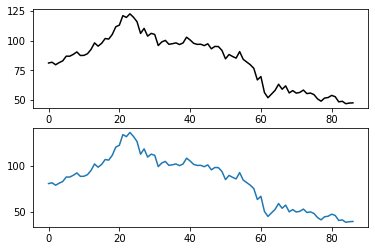

In [40]:
figure, axis = plt.subplots(2)

axis[0].plot(final_prediction, 'black')
axis[1].plot(close_data[700:].values)
plt.show()

## Combined Graphs

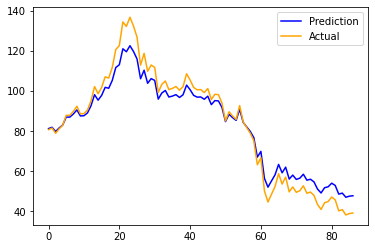

In [44]:
plt.plot(final_prediction, 'blue', label='Prediction')
plt.plot(close_data[700:].values, 'orange', label='Actual')
plt.legend()
plt.show()

## Now Predicting tommorow's solana price using current solana price

In [45]:
import requests 

In [47]:
price_url = "https://api.coingecko.com/api/v3/coins/solana"

In [48]:
response = requests.get(price_url)

json_response = response.json()

## Gets the current Solana price from the api 

In [78]:
current_price = json_response['market_data']['current_price']['usd']

In [79]:
next_day_pred_data = []
next_day_pred_data.append(current_price)

In [80]:
next_day_pred_data = np.array(next_day_pred_data)

type(next_day_pred_data)

numpy.ndarray

In [81]:
# Adding the min max scaler to the test data 
next_day_pred_data = scaler.transform(next_day_pred_data.reshape(-1, 1))

In [82]:
next_day_pred_data = np.reshape(next_day_pred_data, (next_day_pred_data.shape[0], next_day_pred_data.shape[1], 1))

In [83]:
future_prediction = model.predict(next_day_pred_data)

future_prediction = np.reshape(future_prediction, (1, 1))

In [84]:
future_prediction = scaler.inverse_transform(future_prediction)
print(future_prediction)

final_amt = future_prediction[0][0]


[[49.728256]]


In [85]:
print(f"The future final amount is: {final_amt}")

The future final amount is: 49.72825622558594
